In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

import scipy.stats.distributions as dist
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Sam/Desktop/LEARN/IBM Machine Learning/Assignments/Supermarket Customers Cluster/Customers.csv') 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop(['CustomerID'], axis="columns", inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


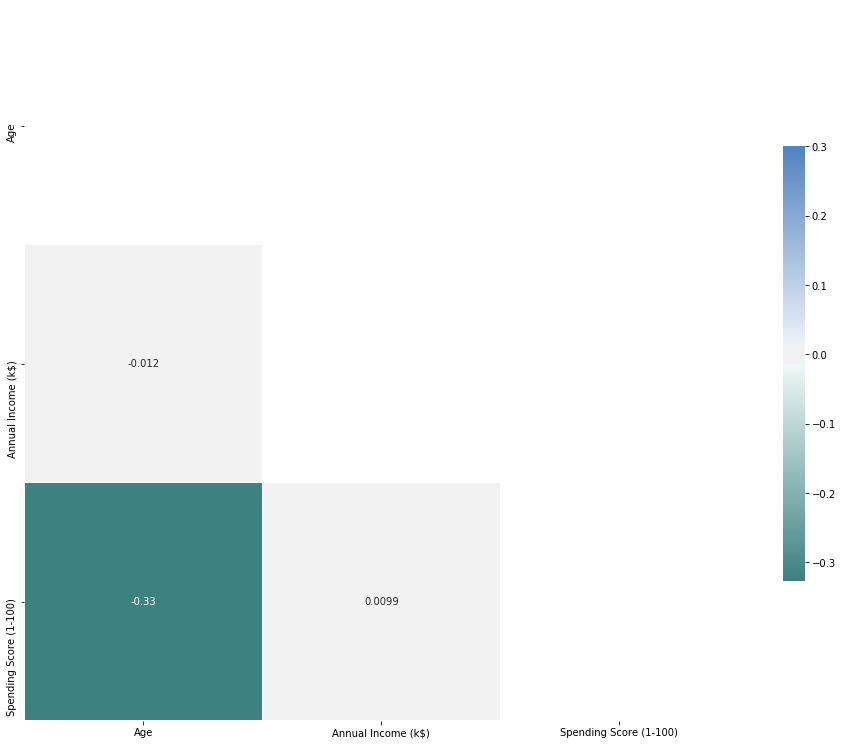

In [5]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 250,center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Distribution of Gender')

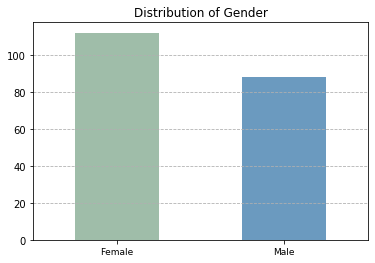

In [6]:
df.Gender.value_counts().plot(kind='bar', color=['#77A285', '#2D70A4'], alpha=0.7)

plt.xticks(fontsize=9, rotation=0)
plt.grid(b=True, which='major', axis='y', linestyle='--')
plt.title('Distribution of Gender')

In [7]:
pd.cut(df['Age'], bins=7).value_counts()

(25.429, 32.857]    43
(32.857, 40.286]    41
(17.948, 25.429]    38
(47.714, 55.143]    28
(40.286, 47.714]    21
(62.571, 70.0]      17
(55.143, 62.571]    12
Name: Age, dtype: int64

In [8]:
# Create bins
bins = [17, 25, 35, 45, 55, 65, 70]

# Create labels for bins
label = ['17-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['AgeBins'] = pd.cut(df['Age'], bins, labels=label)

# Create Dataframe
summary = df.groupby("AgeBins")

# Create new columns with data
index = df.index
df['TotCustomers'] = index.value_counts()

df['% Customers'] = (df['TotCustomers'] / df['TotCustomers'].sum()) * 100


summary = summary[['TotCustomers', '% Customers']]
summary.sum()

,TotCustomers,% Customers
AgeBins,,
17-25,38,19.0
26-35,60,30.0
36-45,36,18.0
46-55,37,18.5
56-65,17,8.5
65+,12,6.0


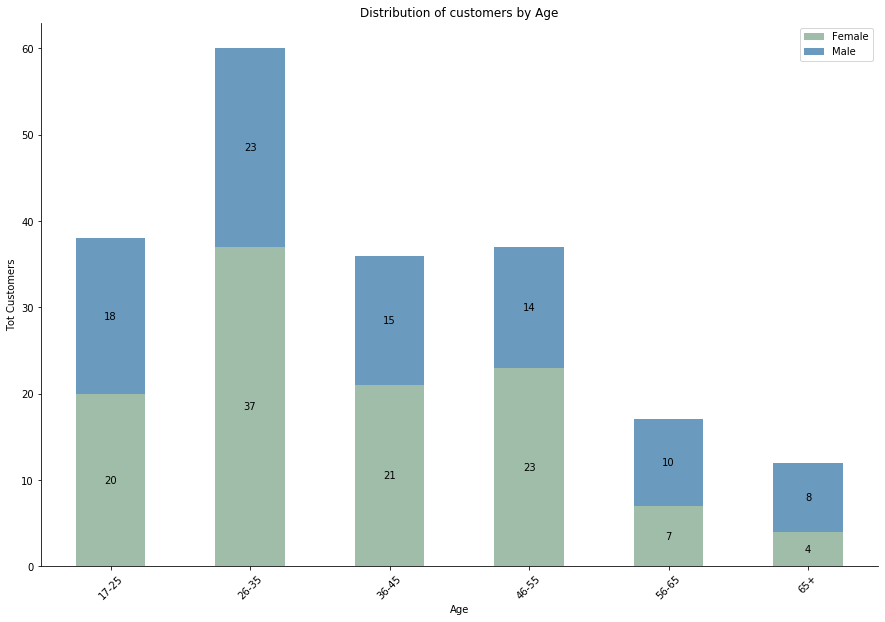

In [9]:
ms = df.groupby(['AgeBins','Gender']).size().unstack().plot(kind='bar', color=['#77A285', '#2D70A4'], 
            alpha=0.7,  stacked=True, legend=False, figsize=(15, 10))

for p in ms.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ms.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Tot Customers')
plt.title('Distribution of customers by Age')
plt.legend()

ms.spines['top'].set_visible(False)
ms.spines['right'].set_visible(False)
plt.grid(b=False, which='major', axis='y', linestyle='')

In [10]:
pd.cut(df['Spending Score (1-100)'], bins=6).value_counts()

(33.667, 50.0]      54
(50.0, 66.333]      40
(0.902, 17.333]     33
(66.333, 82.667]    30
(82.667, 99.0]      27
(17.333, 33.667]    16
Name: Spending Score (1-100), dtype: int64

In [11]:
# Create bins
bins = [0, 20, 40, 60, 80, 100]

# Create labels for bins
label = ['0-20', '21-40', '41-60', '61-80', '81-100']

df['Spending Score Bins'] = pd.cut(df['Spending Score (1-100)'], bins, labels=label)
                                      

# Create Dataframe
summary = df.groupby("Spending Score Bins")

# Create new columns with data
index = df.index
df['TotCustomers'] = index.value_counts()

df['% Customers'] = (df['TotCustomers'] / df['TotCustomers'].sum()) * 100


summary = summary[['TotCustomers', '% Customers']]
summary.sum()

,TotCustomers,% Customers
Spending Score Bins,,
0-20,36,18.0
21-40,27,13.5
41-60,75,37.5
61-80,32,16.0
81-100,30,15.0


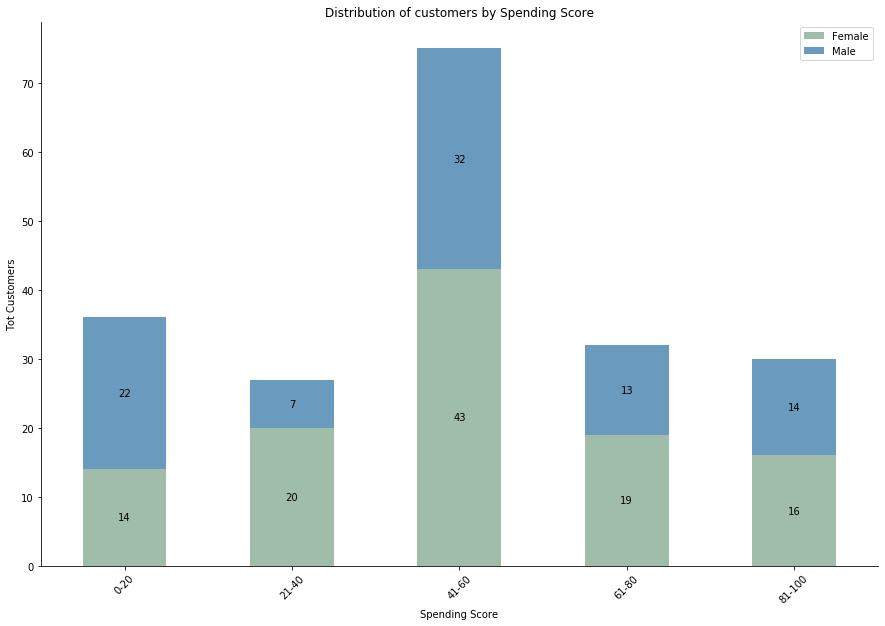

In [12]:
ms = df.groupby(['Spending Score Bins','Gender']).size().unstack().plot(kind='bar', color=['#77A285', '#2D70A4'], 
            alpha=0.7,  stacked=True, legend=False, figsize=(15, 10))

for p in ms.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ms.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.xticks(rotation=45)
plt.xlabel('Spending Score')
plt.ylabel('Tot Customers')
plt.title('Distribution of customers by Spending Score')
plt.legend()

ms.spines['top'].set_visible(False)
ms.spines['right'].set_visible(False)
plt.grid(b=False, which='major', axis='y', linestyle='')

In [13]:
pd.cut(df['Annual Income (k$)'], bins=6).value_counts()

(55.667, 76.0]       58
(35.333, 55.667]     48
(14.878, 35.333]     38
(76.0, 96.333]       36
(96.333, 116.667]    14
(116.667, 137.0]      6
Name: Annual Income (k$), dtype: int64

In [14]:
# Create bins
bins = [14, 30, 45, 60, 75, 90, 137]

# Create labels for bins
label = ['14-30K','31-45K', '45-60K', '61-75K', '76-90K', '91-137K']

df['Annual Income Bins'] = pd.cut(df['Annual Income (k$)'], bins, labels=label)
                                      

# Create Dataframe
summary = df.groupby("Annual Income Bins")

# Create new columns with data
index = df.index
df['TotCustomers'] = index.value_counts()

df['% Customers'] = (df['TotCustomers'] / df['TotCustomers'].sum()) * 100


summary = summary[['TotCustomers', '% Customers']]
summary.sum()

,TotCustomers,% Customers
Annual Income Bins,,
14-30K,32,16.0
31-45K,26,13.0
45-60K,40,20.0
61-75K,44,22.0
76-90K,36,18.0
91-137K,22,11.0


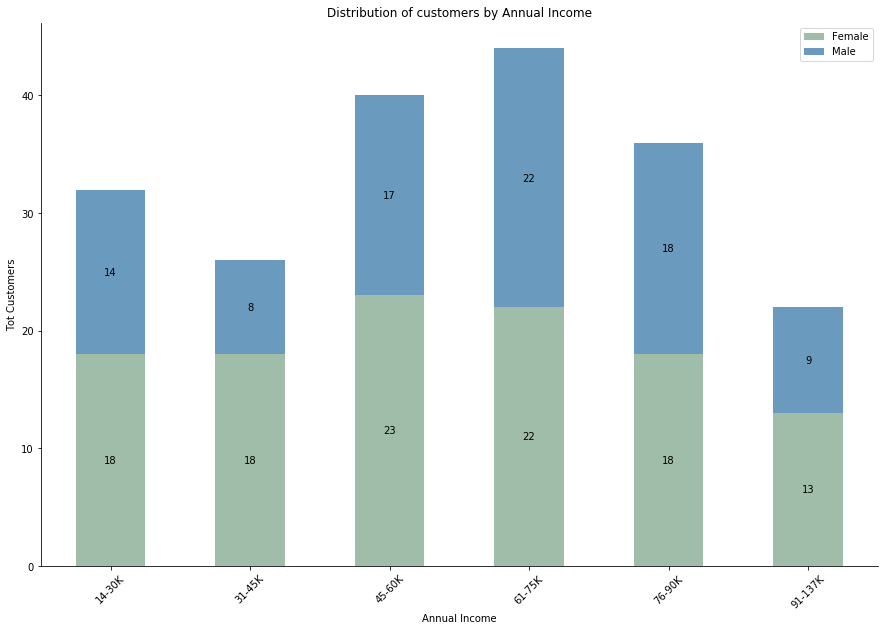

In [15]:
ms = df.groupby(['Annual Income Bins','Gender']).size().unstack().plot(kind='bar', color=['#77A285', '#2D70A4'], 
            alpha=0.7,  stacked=True, legend=False, figsize=(15, 10))

for p in ms.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ms.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.xticks(rotation=45)
plt.xlabel('Annual Income')
plt.ylabel('Tot Customers')
plt.title('Distribution of customers by Annual Income')
plt.legend()

ms.spines['top'].set_visible(False)
ms.spines['right'].set_visible(False)
plt.grid(b=False, which='major', axis='y', linestyle='')

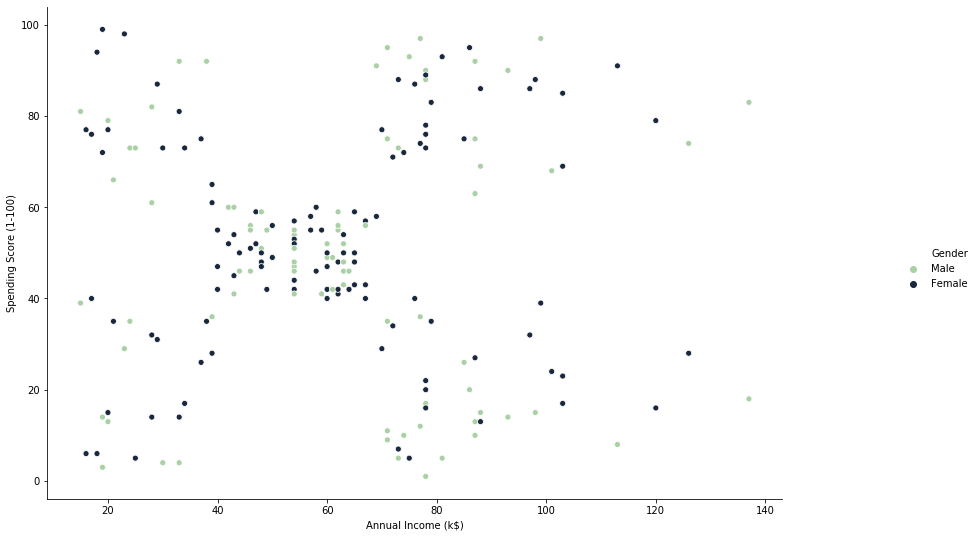

In [16]:
fig1 = sns.relplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="ch:r=-.5,l=.75")
fig1.fig.set_figwidth(15)
fig1.fig.set_figheight(8)

### K-Means 

In [17]:
from sklearn.cluster import KMeans 

X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

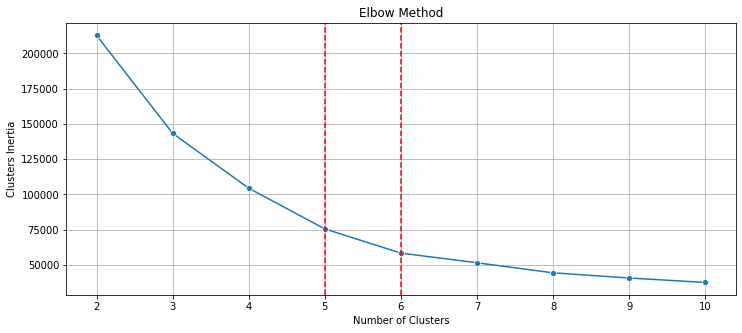

In [18]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Clusters Inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [19]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

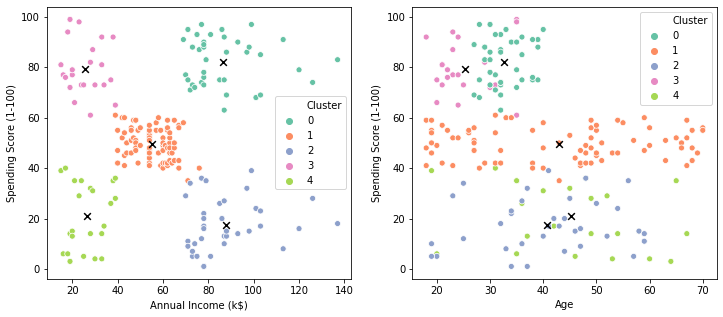

In [20]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set2', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set2', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='x', s=45, c="k")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='x', s=45, c="k")
plt.show()

K-Means algorithm generated the following 5 clusters:

clients with low annual income and high spending score
clients with medium annual income and medium spending score
clients with high annual income and low spending score
clients with high annual income and high spending score
clients with low annual income and low spending score
There are no distinct groups is terms of customers age.

In [21]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,80
2,36
3,22
4,23


### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

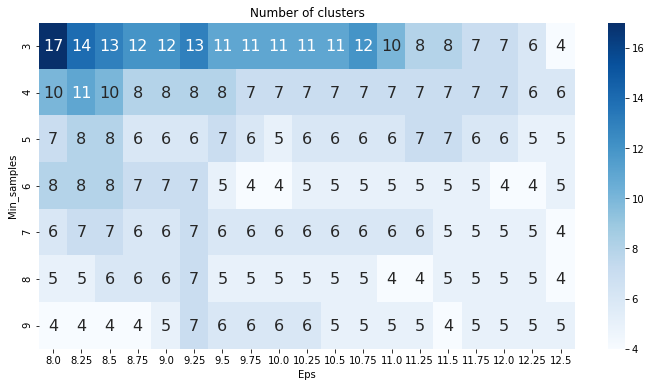

In [23]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Blues", ax=ax)
ax.set_title('Number of clusters')
plt.show()

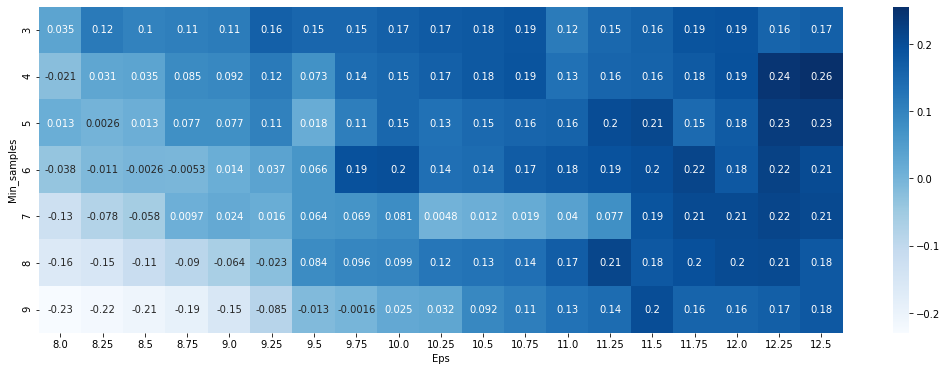

In [24]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Blues", ax=ax)
plt.show()

In [25]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [26]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


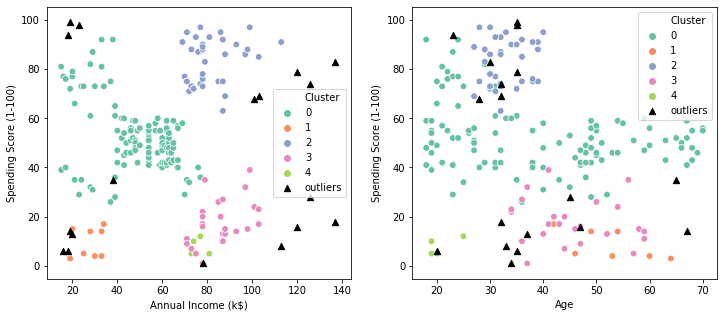

In [27]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=40, label='outliers', marker="^", c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=40, label='outliers', marker="^", c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

### Affinity Propagation

### K-Means, DBSCAN and Affinity propagation Comparison

In [30]:
comparison = pd.concat([KM_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
comparison

,KM_size,DBSCAN_size
Cluster,,
-1,NaN,18
0,39.0,112
1,80.0,8
2,36.0,34
3,22.0,24
4,23.0,4
